In [1]:
!pip install yfinance

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# df = pdr.get_data_yahoo(주식 종목(한국주식의 경우 ".KS") [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])

# 종류별 데이터 받아오기
SNP500 = pdr.get_data_yahoo('^GSPC')
NASDAQ = pdr.get_data_yahoo('^IXIC')
DOWINDEX = pdr.get_data_yahoo('^DJI')
DOLLARINDEX = pdr.get_data_yahoo('DX-Y.NYB')
GOLD = pdr.get_data_yahoo('GC=F')


# 받아온 데이터들을 같은 날짜 기준으로(2001년 1월)으로 맞추고 종가와 거래량만 추출
GOLD_1 = GOLD.iloc[84:]
GOLD_2 = GOLD_1[['Close']]


DOLLARINDEX_1 = DOLLARINDEX.iloc[7655:]
DOLLARINDEX_2 = DOLLARINDEX_1[['Close']]


DOWINDEX_1 = DOWINDEX.iloc[2274:]
DOWINDEX_2 = DOWINDEX_1[['Close']]


NASDAQ_1 = NASDAQ.iloc[7556:]
NASDAQ_2 = NASDAQ_1[['Close']]


SNP500_1 = SNP500.iloc[18330:]
SNP500_2 = SNP500_1[['Close']]


# 추출한 데이터들을 하나로 합침
total = SNP500_2.join(NASDAQ_2, how='outer', lsuffix='_snp')
total = total.join(DOWINDEX_2, how='outer', lsuffix='_nasdaq')
total = total.join(GOLD_2, how='outer', lsuffix='_dow')
total = total.join(DOLLARINDEX_2, how='outer', lsuffix='_gold')
total.columns = ['snp500_close', 'nasdaq_close', 'dow_close', 'gold_close', 'dxy_close']

# 결측치를 보간법으로 채움
total_data = total.interpolate(method='time')

total_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,snp500_close,nasdaq_close,dow_close,gold_close,dxy_close
Date,,,,,
2001-01-02 00:00:00-05:00,1283.270020,2291.860107,10646.150391,268.399994,108.769997
2001-01-03 00:00:00-05:00,1347.560059,2616.689941,10945.750000,268.000000,110.169998
2001-01-04 00:00:00-05:00,1333.339966,2566.830078,10912.410156,267.299988,108.809998
2001-01-05 00:00:00-05:00,1298.349976,2407.649902,10662.009766,268.000000,108.419998
2001-01-08 00:00:00-05:00,1295.859985,2395.919922,10621.349609,268.000000,108.860001
...,...,...,...,...,...
2023-01-24 00:00:00-05:00,4016.949951,11334.269531,33733.960938,1933.900024,101.919998
2023-01-25 00:00:00-05:00,4016.219971,11313.360352,33743.839844,1941.199951,101.639999
2023-01-26 00:00:00-05:00,4060.429932,11512.410156,33949.410156,1929.099976,101.839996


In [33]:
# 비슷한 것들끼리만 묶음
snp500_nas_dow = total_data[['snp500_close','nasdaq_close','dow_close']]
snp500_nas_dow.head()

,snp500_close,nasdaq_close,dow_close
Date,,,
2001-01-02 00:00:00-05:00,1283.270020,2291.860107,10646.150391
2001-01-03 00:00:00-05:00,1347.560059,2616.689941,10945.750000
2001-01-04 00:00:00-05:00,1333.339966,2566.830078,10912.410156
2001-01-05 00:00:00-05:00,1298.349976,2407.649902,10662.009766
2001-01-08 00:00:00-05:00,1295.859985,2395.919922,10621.349609


In [43]:
# 500, dxy 비교
snp500_dxy = total_data[['snp500_close','dxy_close']]
snp500_dxy.head()

,snp500_close,dxy_close
Date,,
2001-01-02 00:00:00-05:00,1283.270020,108.769997
2001-01-03 00:00:00-05:00,1347.560059,110.169998
2001-01-04 00:00:00-05:00,1333.339966,108.809998
2001-01-05 00:00:00-05:00,1298.349976,108.419998
2001-01-08 00:00:00-05:00,1295.859985,108.860001


In [53]:
# 상반되는것들 끼리 묶음
gold_dxy = total_data[['gold_close','dxy_close']]
gold_dxy.head()

,gold_close,dxy_close
Date,,
2001-01-02 00:00:00-05:00,268.399994,108.769997
2001-01-03 00:00:00-05:00,268.000000,110.169998
2001-01-04 00:00:00-05:00,267.299988,108.809998
2001-01-05 00:00:00-05:00,268.000000,108.419998
2001-01-08 00:00:00-05:00,268.000000,108.860001


In [52]:
# 500, 금 비교
gold_500 = total_data[['snp500_close', 'gold_close']]
gold_500.head()

,snp500_close,gold_close
Date,,
2001-01-02 00:00:00-05:00,1283.270020,268.399994
2001-01-03 00:00:00-05:00,1347.560059,268.000000
2001-01-04 00:00:00-05:00,1333.339966,267.299988
2001-01-05 00:00:00-05:00,1298.349976,268.000000
2001-01-08 00:00:00-05:00,1295.859985,268.000000


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

a = scaler.fit(snp500_nas_dow)
snp500_nas_dow_0 = a.transform(snp500_nas_dow)

b = scaler.fit(gold_dxy)
gold_dxy_0 = b.transform(gold_dxy)

c = scaler.fit(snp500_dxy)
snp500_dxy_0 = c.transform(snp500_dxy)

d = scaler.fit(gold_500)
gold_500_0 = d.transform(gold_500)

S&P500(미국 신용평가사 S&P Global이 미국에 상장된 시가총액 상위 500개 기업의 주식들을 모아 지수로 묶은것), 

다우지수(월스트리트 저널 편집자이자 Dow Jones & Company의 공동창립자 Charles Dow가 창안한 주가지수이며 미국의 증권거래소에 상장된 30개의 우량기업 주식 종목들로 구성됨),

나스닥지수(나스닥 증권거래소에 상장돼 있는 3,000개 가량의 보통주를 가중평균하여 나타내는 미국증시의 대표적인 주가지수),

금 그리고 

달러인덱스(유로, 엔, 파운드, 캐나다 달러, 스웨덴 크로나, 스위스 프랑 등 경제 규모가 크거나 통화가치가 안정적인 세계 주요 6개국 통화에 대한 미국 달러화의 평균 가치를 지수화한 것. 1973년 3월을 기준점(100)으로 함)

.

.


간의 관계를 알아보고 어떤 관계인지, 또 가격변동에 어떤 요인들이 있을지에 대한 분석 시도







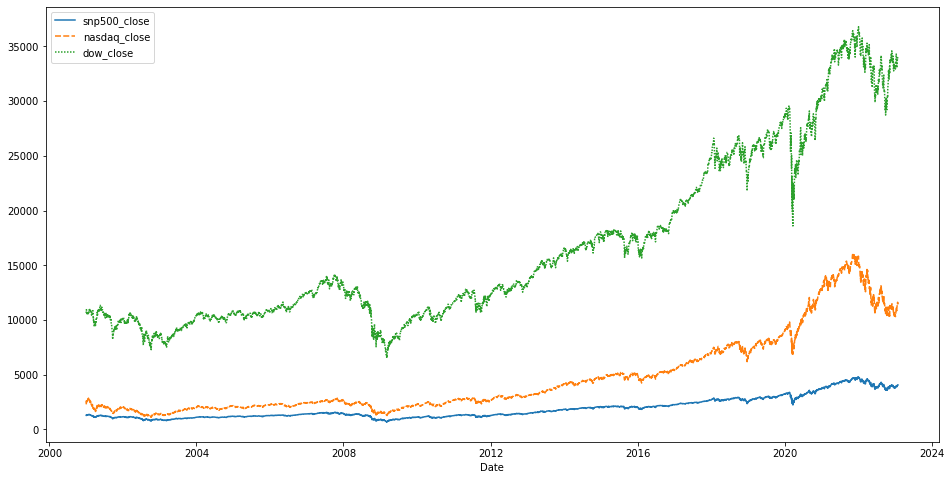

In [41]:
plt.figure(figsize=(16,8))
sns.lineplot(data = snp500_nas_dow)

먼저 관련성이 높을 것으로 예상되는 snp500, 나스닥, 다우지수의 경우 비슷한 패턴을 보이는 것 같지만 각각의 가격의 차이가 크기 때문에 정확하게는 알 수 없음.

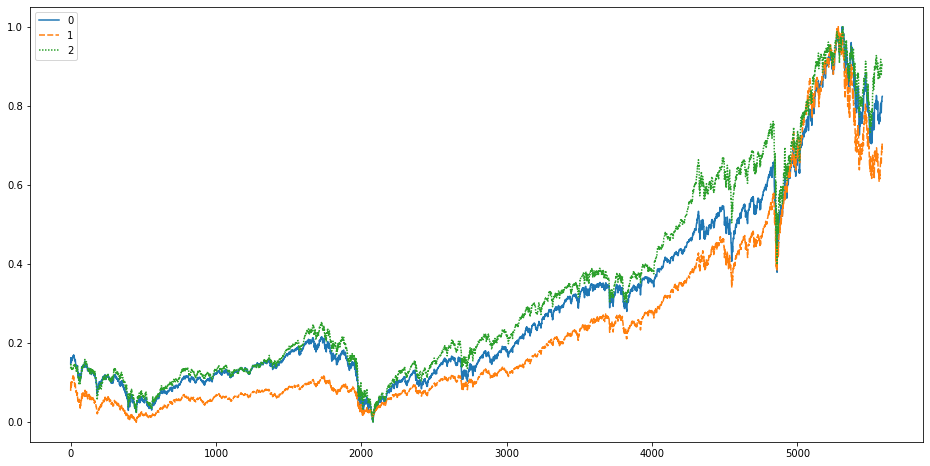

In [42]:
plt.figure(figsize=(16,8))
sns.lineplot(data = snp500_nas_dow_0)


그렇기 때문에 3개의 가격을 정규화를 통하여 같은 수준으로 만들어 준 후 다시 비교를 해 보았다.

그랬더니 처음에 예상한 것 처럼 3개의 가격이 거의 비슷한 패턴을 이루고 있음을 확인 할 수 있었다.

이는 3가지 종류가 모두 미국의 경제상황, 증시등을 거의 동일하게 반영하기 때문으로 추측된다.

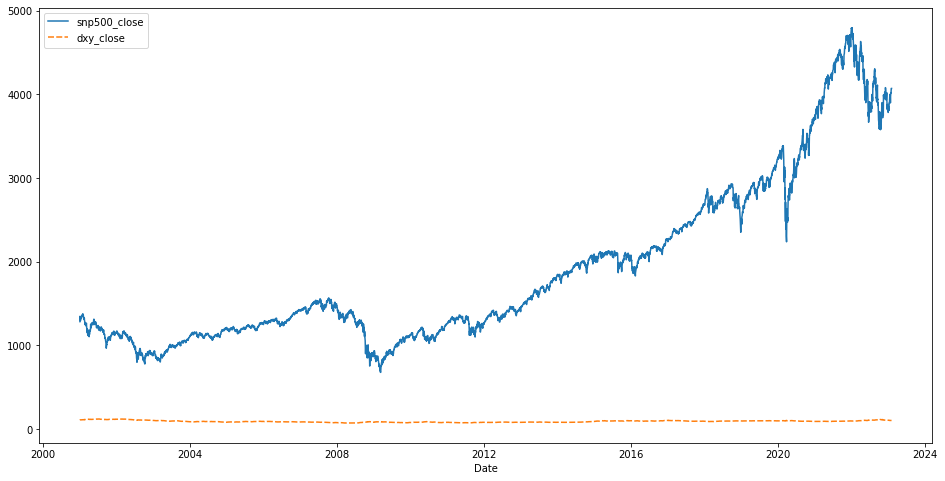

In [46]:
plt.figure(figsize=(16,8))
sns.lineplot(data = snp500_dxy)

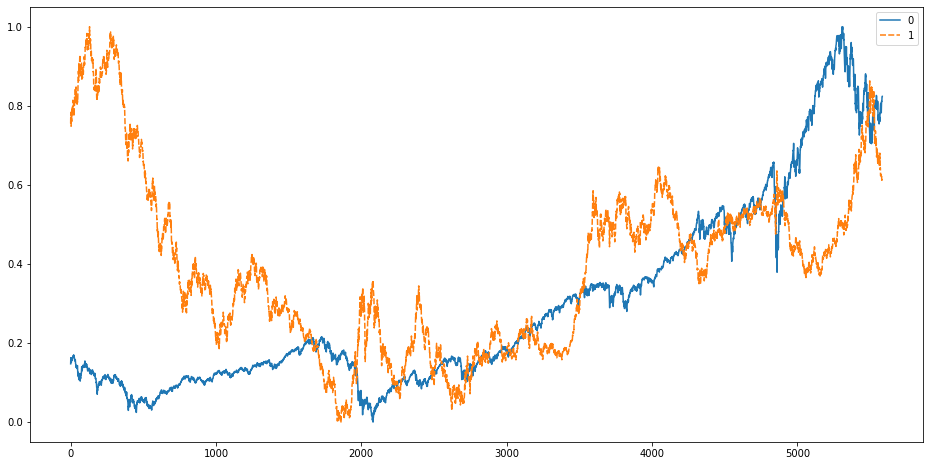

In [47]:
plt.figure(figsize=(16,8))
sns.lineplot(data = snp500_dxy_0)

그렇다면 달러가치의 지표가 되는 달러인덱스와도 비슷한 패턴일까?

.


이전처럼 동일한 수치가 아니었기 때문에 정규화를 거친후 다시 비교해 본 결과 

어느정도 큰 추세를 같이 따라가는 듯 하였으나 이전의 3종류를 비교할때와는 다르게 같은 패턴이라고는 보기 어려웠다.

이는 미국주식 시장의 상황을 나타낸다고 할 수 있는 S&P500이 달러가치에 영향을 주기는 하지만 절대적인 것은 아니며, 

이외에도 다른 요인이 있다고 생각 할 수 있다.

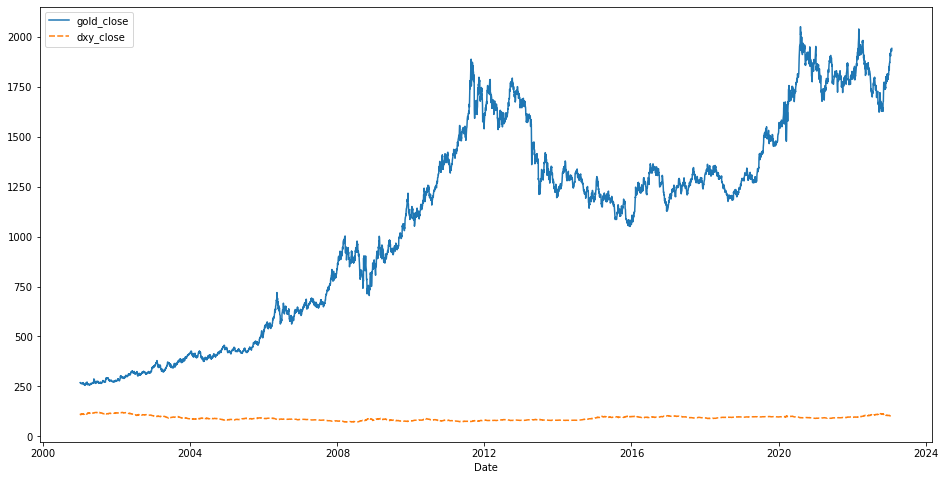

In [48]:
plt.figure(figsize=(16,8))
sns.lineplot(data = gold_dxy)

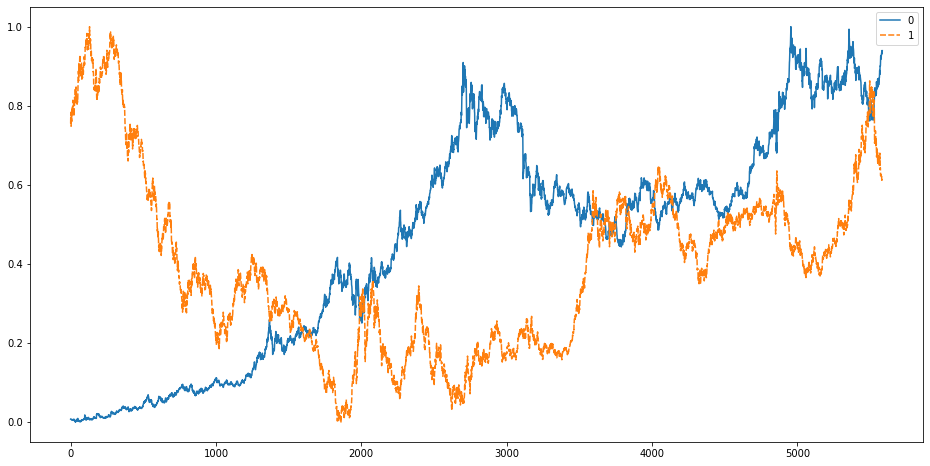

In [49]:
plt.figure(figsize=(16,8))
sns.lineplot(data = gold_dxy_0)

그렇다면 달러와 금의 관계는 어떨까?

전통적으로 달러와 금은 서로 상반되는 관계에 있다고 한다. 

데이터 상으로도 금값이 상승하는 시기에는 달러가치가 하락했고, 달러가치가 상승하는 시기에는 금값이 상승하는 것을 확인 할 수 있었다.

이것은 미국의 경제가 좋지 못 하다면(달러가치의 하락) 이것이 다른 나라에도 크게 영향을 끼쳐 세계적으로 경제가 나빠질 것을 우려하여

안전자산인 금의 가격이 상승하는 것으로 생각된다. (호황의 경우 안전자산이 아닌 주식등을 선호)



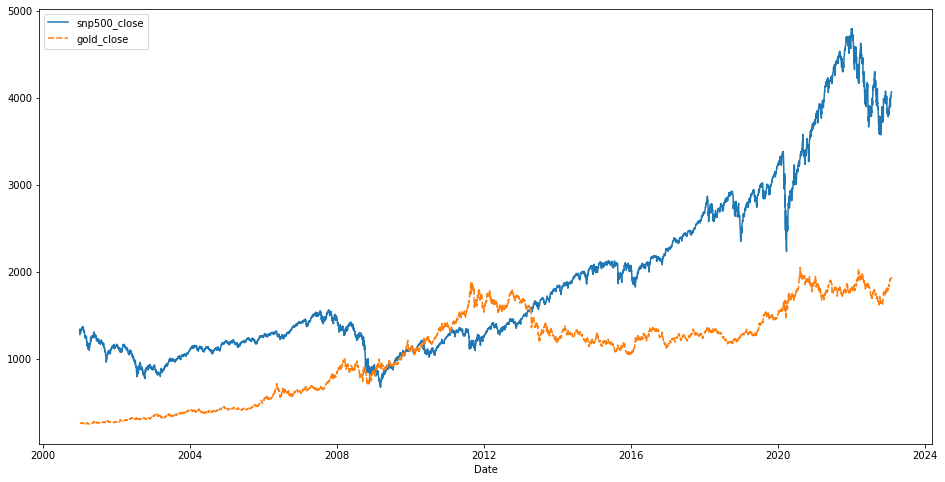

In [59]:
plt.figure(figsize=(16,8))
sns.lineplot(data = gold_500)

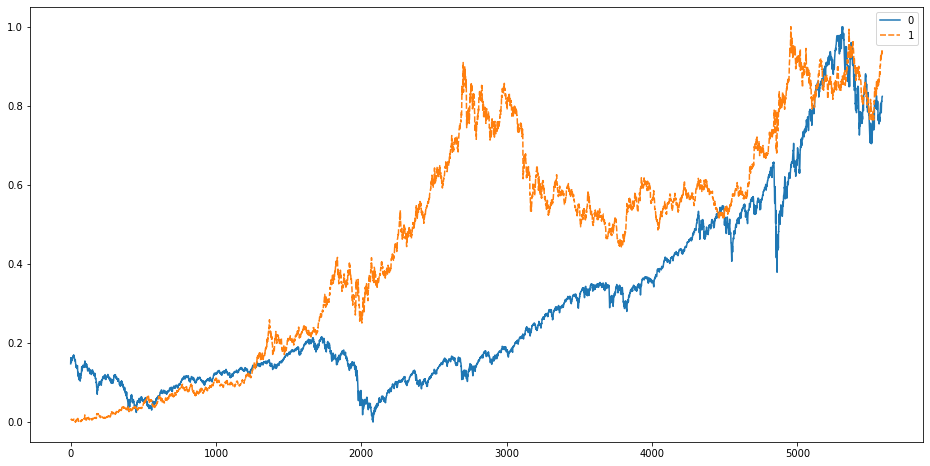

In [58]:
plt.figure(figsize=(16,8))
sns.lineplot(data = gold_500_0)

S&P500과 금의 관계도 

금이 상승할땐 S&P500이 저조한 모습을 보여주었고 S&P500이 상승할 땐 금이 저조한 모습을 보였다.

이는 금이 선호되는 시기(경제위기 등으로 안전자산을 선호하게 되는 등의)에는 자금이 주식시장으로 가지 않고 금이나 채권등을 사고, 

반대로 경기가 좋고 성장할것이라 생각되어 주식시장에 자금이 공급될 때에는 금을 사지 않기 때문으로 추측된다.